# Unsupervised Learning


---


Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.

Examples of Unsupervised Learning

> Clustering: Grouping together unlabeled data points into categories/clusters. Data points are assigned to a cluster based on similarity

> Anomaly Detection: Attempts to detect outliers in a dataset. For example, fraudulent transactions on a credit card.

> Dimensionality Reduction: Data processing techniques that reduces the number of features in a data set, either for compression, or to better understand underlying trends within a data set.


**Dataset**

For unsupervised learning, we will use marketing campaign dataset:

**Link:** https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis 

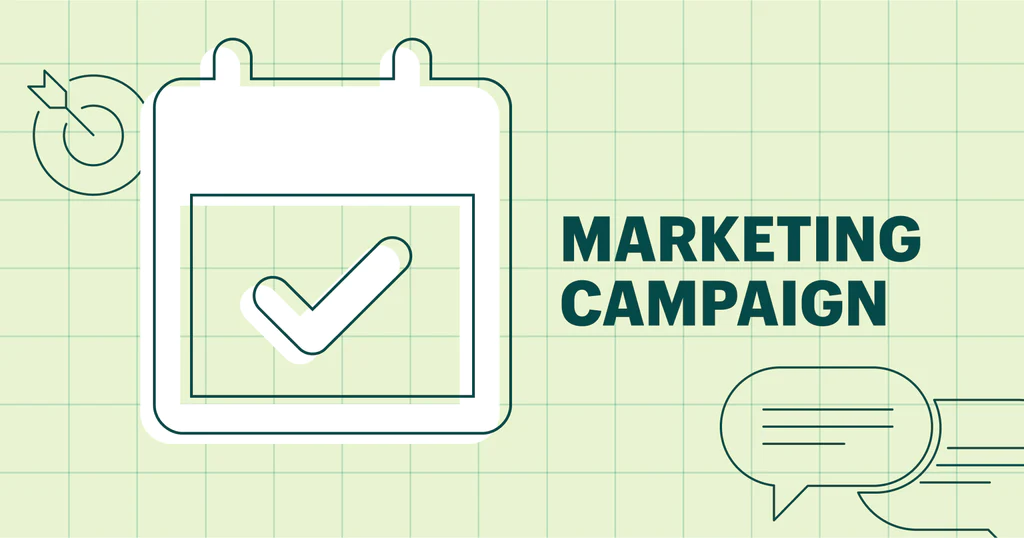

Customer Personality Analysis is a strategic approach that analyzes a company's ideal customers. This analysis enables businesses to understand their customers more deeply and tailors their products according to the distinctive needs, behaviors, and concerns of different customer segments. By applying this strategy, a business can efficiently target the most likely customer segment to purchase its product, leading to optimized marketing efforts and cost efficiency.

**Description for each feature in the dataset:**

**People**

- **ID**: The unique identifier of a customer.
- **Year_Birth**: The birth year of the customer.
- **Education**: The education level attained by the customer.
- **Marital_Status**: The marital status of the customer.
- **Income**: The total yearly household income of the customer.
- **Kidhome**: The number of children in the customer's household.
- **Teenhome**: The number of teenagers in the customer's household.
- **Dt_Customer**: The date when the customer enrolled with the company.
- **Recency**: The number of days since the customer's last purchase.
- **Complain**: Flag to indicate if the customer lodged a complaint in the last 2 years. 1 for Yes, 0 for No.

**Products**

- **MntWines**: The amount spent on wine in the last 2 years.
- **MntFruits**: The amount spent on fruits in the last 2 years.
- **MntMeatProducts**: The amount spent on meat in the last 2 years.
- **MntFishProducts**: The amount spent on fish in the last 2 years.
- **MntSweetProducts**: The amount spent on sweets in the last 2 years.
- **MntGoldProds**: The amount spent on gold in the last 2 years.

**Promotion**

- **NumDealsPurchases**: The number of purchases made with a discount.
- **AcceptedCmp1**: Flag to indicate if the customer accepted the offer in the 1st campaign. 1 for Yes, 0 for No.
- **AcceptedCmp2**: Flag to indicate if the customer accepted the offer in the 2nd campaign. 1 for Yes, 0 for No.
- **AcceptedCmp3**: Flag to indicate if the customer accepted the offer in the 3rd campaign. 1 for Yes, 0 for No.
- **AcceptedCmp4**: Flag to indicate if the customer accepted the offer in the 4th campaign. 1 for Yes, 0 for No.
- **AcceptedCmp5**: Flag to indicate if the customer accepted the offer in the 5th campaign. 1 for Yes, 0 for No.
- **Response**: Flag to indicate if the customer accepted the offer in the last campaign. 1 for Yes, 0 for No.

**Place**

- **NumWebPurchases**: The number of purchases made through the company's website.
- **NumCatalogPurchases**: The number of purchases made using a catalog.
- **NumStorePurchases**: The number of purchases made directly in stores.
- **NumWebVisitsMonth**: The number of visits to the company's website in the last month.

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
filepath1 = '/content/drive/MyDrive/Colab Notebooks/Datasets/marketing_campaign.csv'

In [ ]:
data = pd.read_csv(filepath1, sep='\t')

In [ ]:
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
data.shape

(2240, 29)

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [ ]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

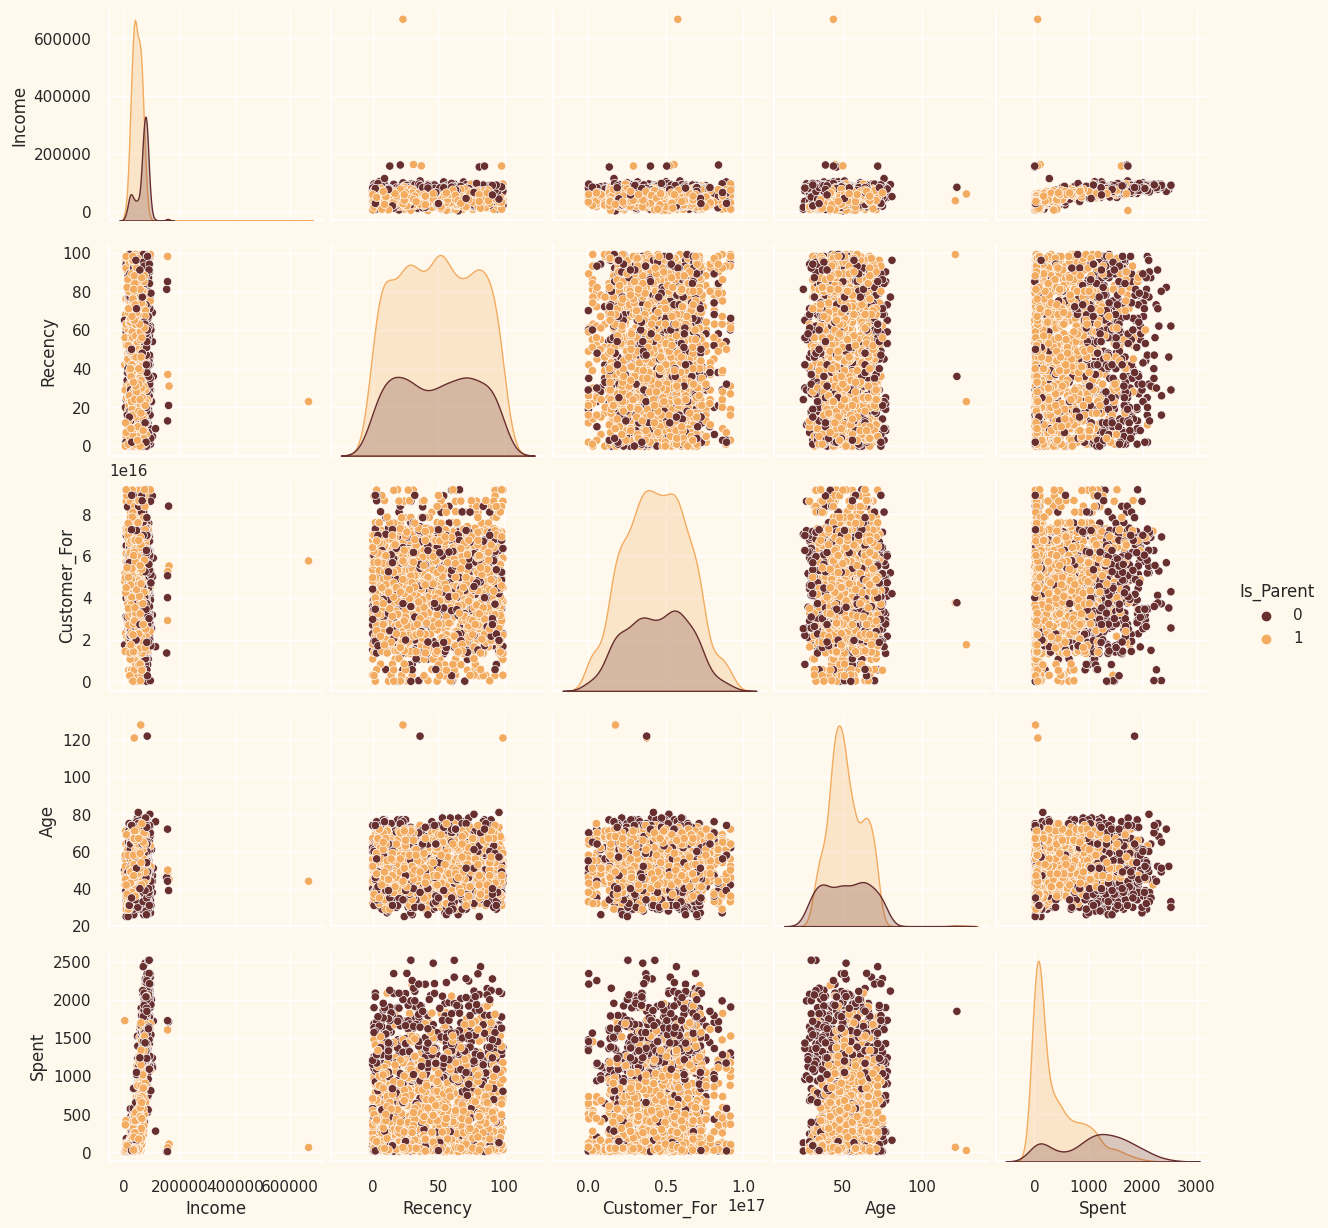

In [ ]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [ ]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<Axes: >

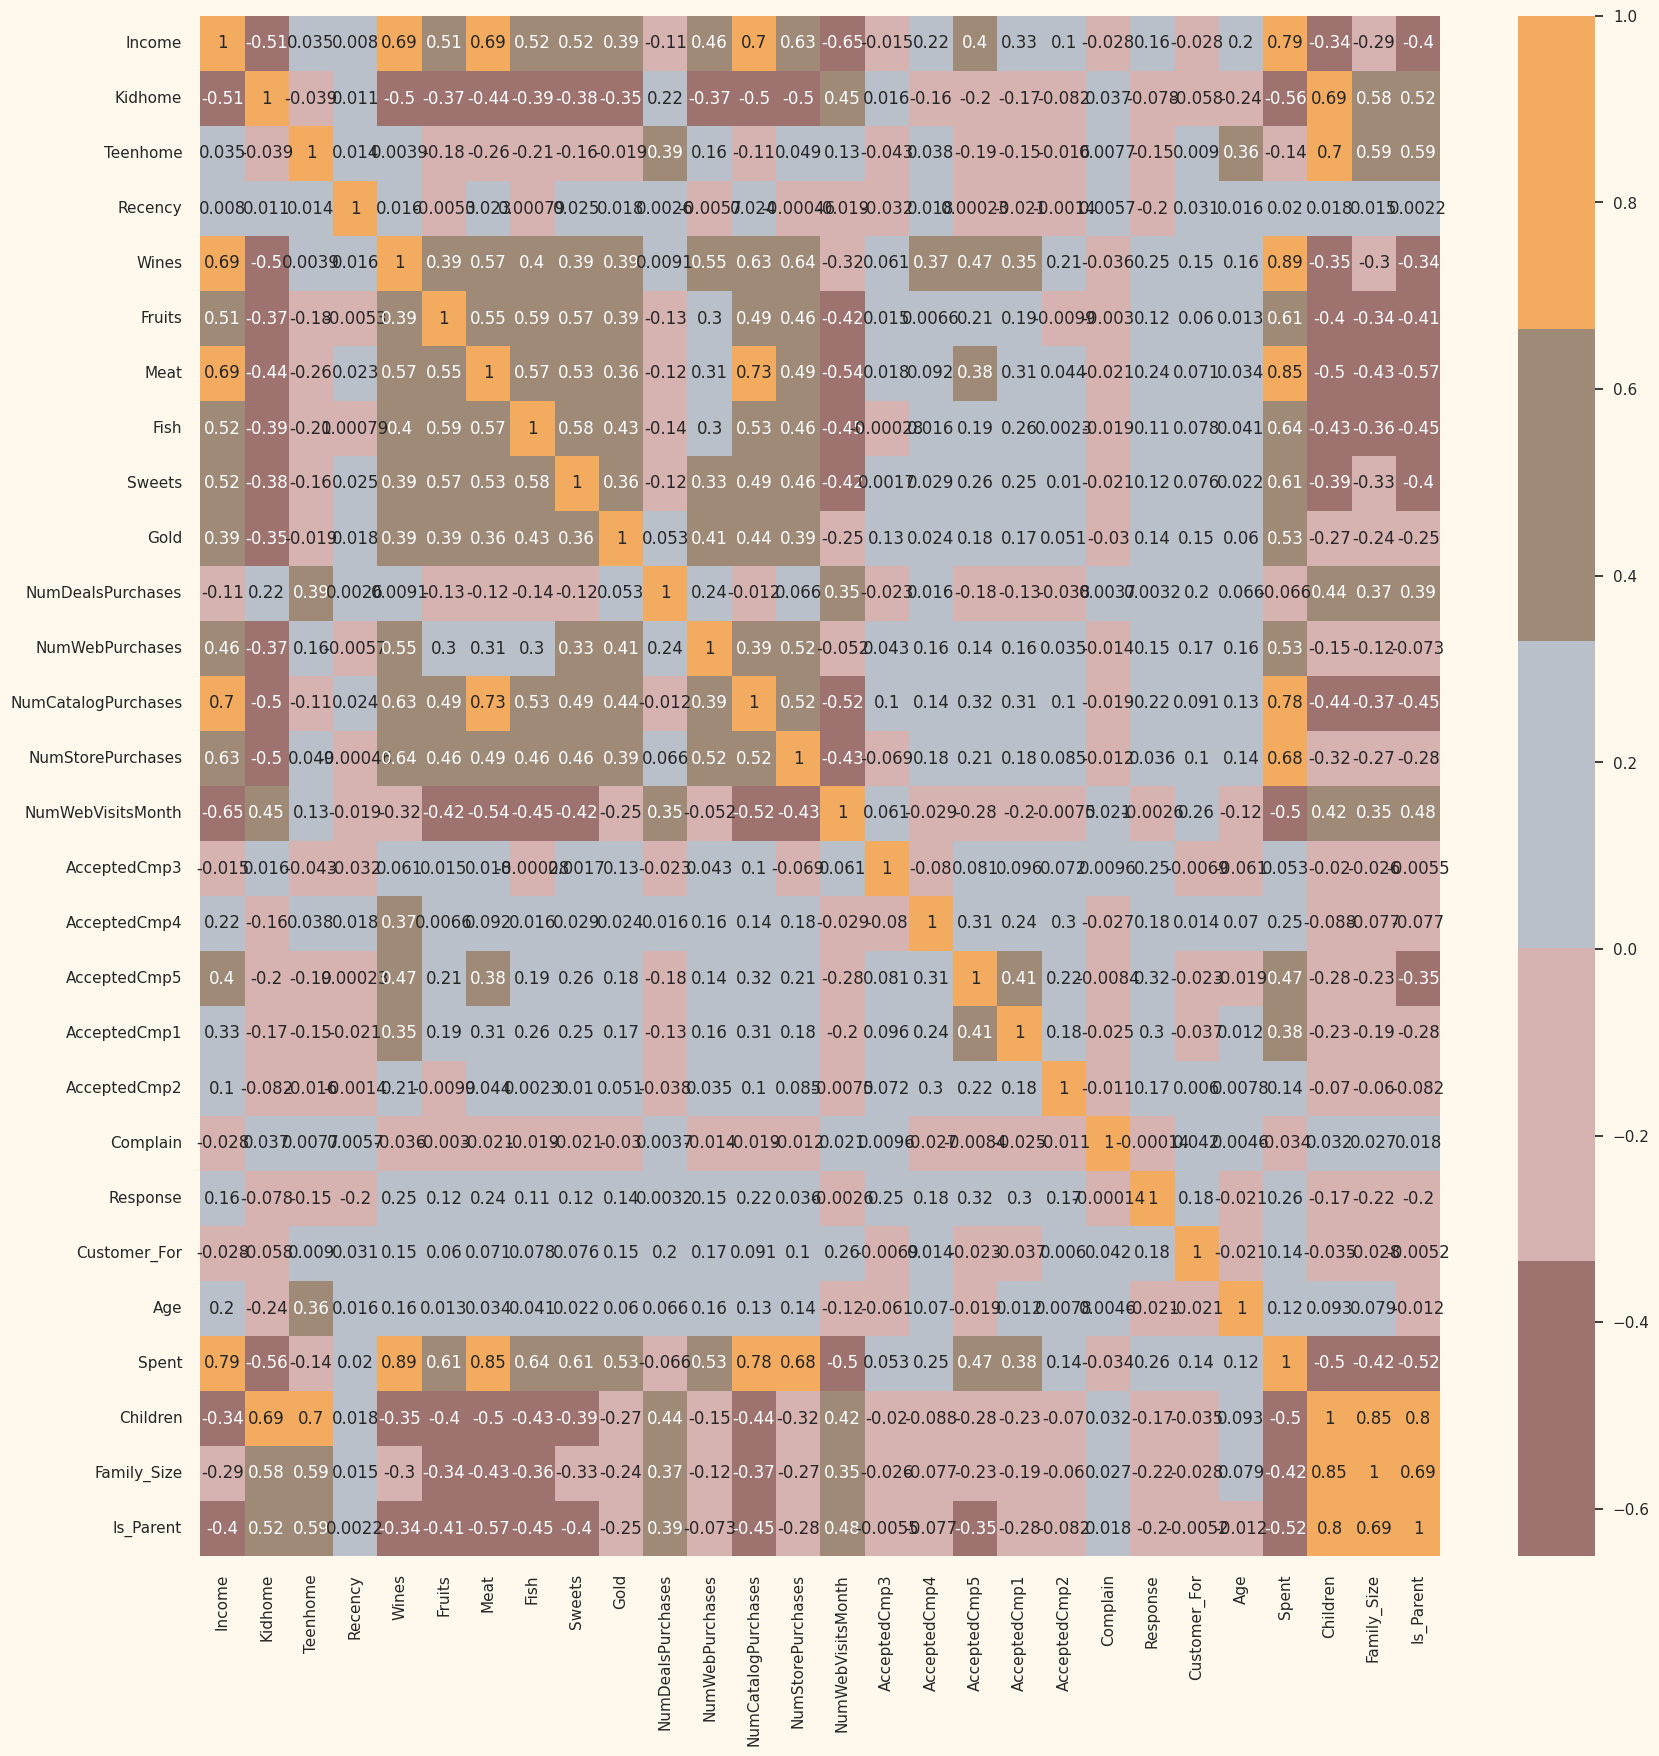

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.555814,0.692181,2.375425,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.171160,-0.132545,-0.420977,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.290224,-0.544908,-0.420977,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.555814,0.279818,-0.420977,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.059532,-0.132545,-0.420977,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,0.000000e+00,2.888309,-5.972968,-2.532243,-0.776071,2.410179,7.544481
col2,2212.0,2.569775e-17,1.707298,-4.302832,-1.336068,-0.154000,1.246210,6.064996
col3,2212.0,3.212219e-17,1.275946,-3.275737,-0.911752,-0.089776,0.802115,5.751345


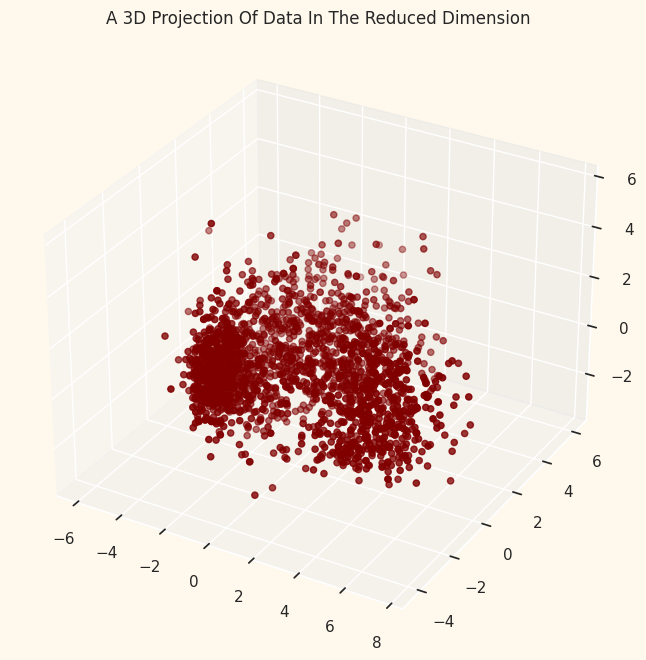

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


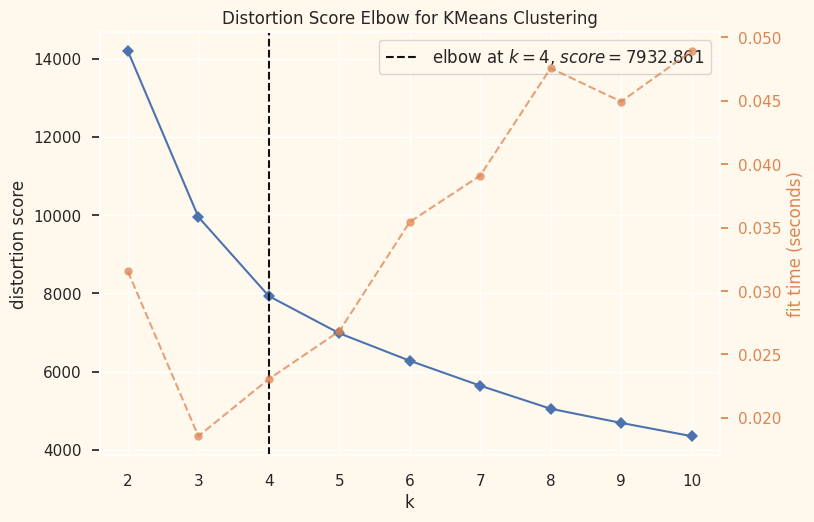

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

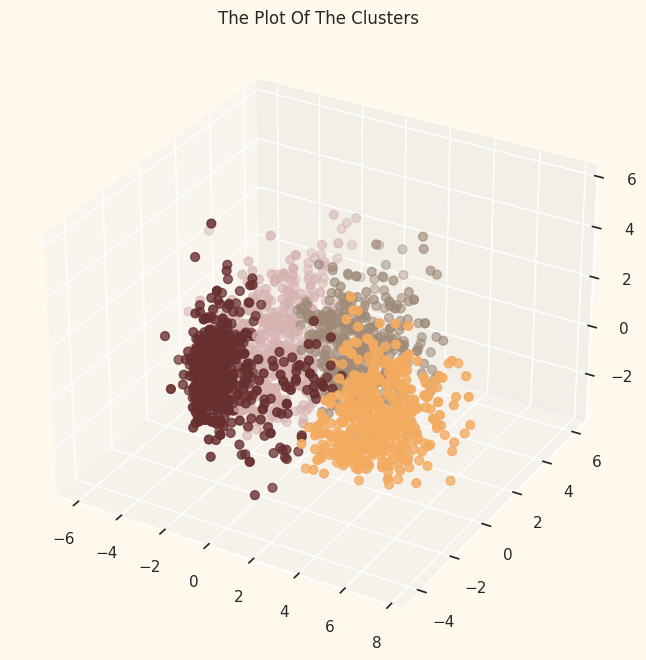

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

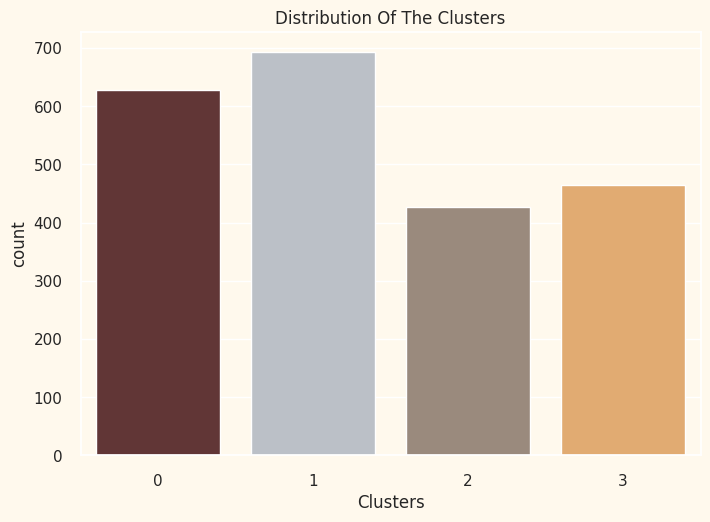

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

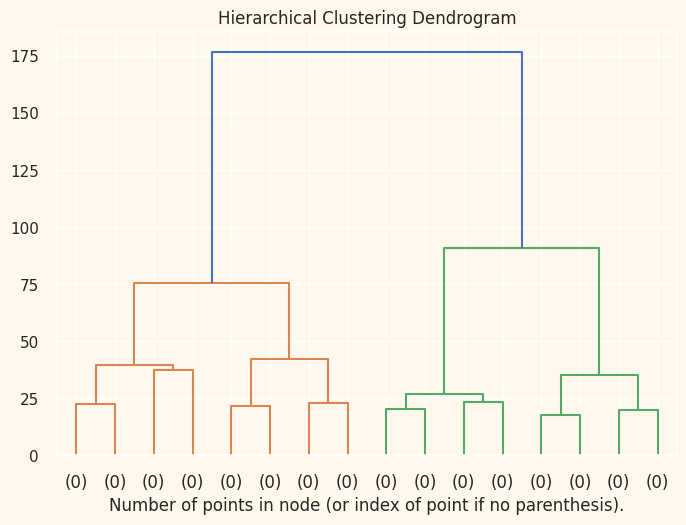

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(PCA_ds)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels = kmeans.predict(data)

# Adding K-means labels to the dataset
data['kmeans_labels'] = labels

# 
clf = RandomForestClassifier()
X = data.drop('Response', axis=1) 
y = data['Response'] # 
clf.fit(X, y)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# predictions
y_pred = clf.predict(X)

print("Accuracy: ", accuracy_score(y, y_pred))
print("Classification Report: ", classification_report(y, y_pred))
print("ROC AUC: ", roc_auc_score(y, y_pred))
print("Confusion Matrix: ", confusion_matrix(y, y_pred))

Accuracy:  0.9918625678119349
Classification Report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00      1879
           1       0.99      0.95      0.97       333

    accuracy                           0.99      2212
   macro avg       0.99      0.98      0.98      2212
weighted avg       0.99      0.99      0.99      2212

ROC AUC:  0.976679180511006
Confusion Matrix:  [[1876    3]
 [  15  318]]


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# create a pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=3), SVC())

# fit the pipeline and evaluate it
pipe.fit(X, y)
scores = cross_val_score(pipe, X, y, cv=5)
print('Average accuracy:', np.mean(scores))

Average accuracy: 0.8652768556632585


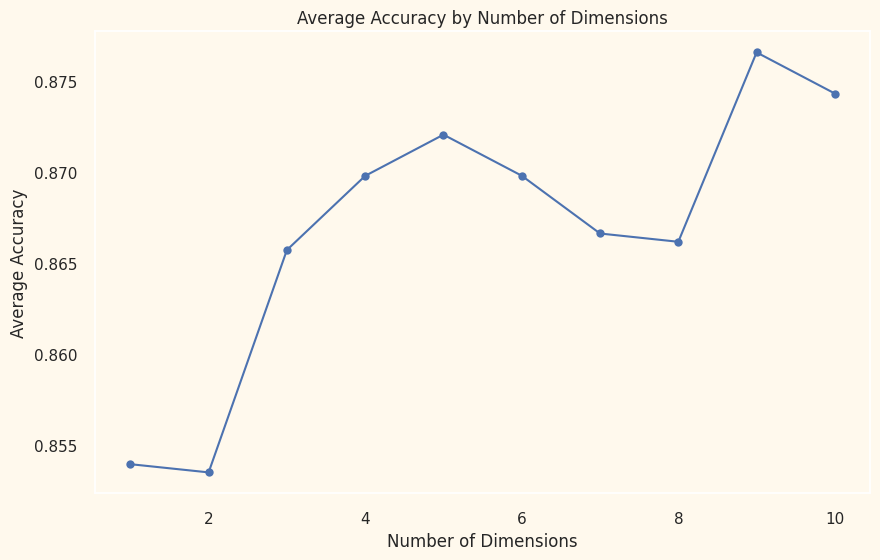

In [ ]:
accuracies = []
dims = list(range(1, 11)) 

for n in dims:
    pipe = make_pipeline(StandardScaler(), PCA(n_components=n), SVC())
    pipe.fit(X, y)
    scores = cross_val_score(pipe, X, y, cv=5)
    accuracies.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(dims, accuracies, marker='o')
plt.title('Average Accuracy by Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Accuracy')
plt.grid()
plt.show()

These are results from a binary classification model:

Accuracy: 0.9919 indicates that about 99.19% of the total predictions made by the model are correct. This is a very high accuracy.

Classification Report: It shows key metrics in a classification problem.

For class 0 (typically the "negative" class):
Precision is 0.99, which means that 99% of the instances predicted as class 0 by the model are actually class 0.
Recall (or Sensitivity) is 1.00, which means that the model correctly identified 100% of the actual class 0 instances.
The F1-score, which is a harmonic mean of precision and recall, is 1.00, indicating a well-performing model for class 0.
For class 1 (typically the "positive" class):
Precision is 0.99, which means that 99% of the instances predicted as class 1 by the model are actually class 1.
Recall is 0.95, which means the model correctly identified 95% of the actual class 1 instances.
The F1-score is 0.97, indicating a well-performing model for class 1, but slightly lower than class 0.
ROC AUC: This is the Area Under the Receiver Operating Characteristics Curve. A value of 0.9767 means that the model is excellent at distinguishing between the positive and negative class. A score of 1 represents a perfect classifier, so 0.9767 is very good.

Confusion Matrix: It's a performance measurement for the classification problems.

The first row of the confusion matrix corresponds to class 0: 1876 were correctly classified (true negatives), while 3 were wrongly classified as class 1 (false positives).
The second row corresponds to class 1: 318 were correctly classified (true positives), but 15 were wrongly classified as class 0 (false negatives).
Overall, these metrics indicate a highly accurate and well-performing model. The model seems to have a slightly harder time predicting class 1 correctly all the time (with 15 instances misclassified), but it's still doing a great job.